/tmp/ipykernel_1485484/4202234368.py:53: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index=['Postprocessing', 'Dataset Size'], columns=['Model'], values='Optimality Gap (%)')


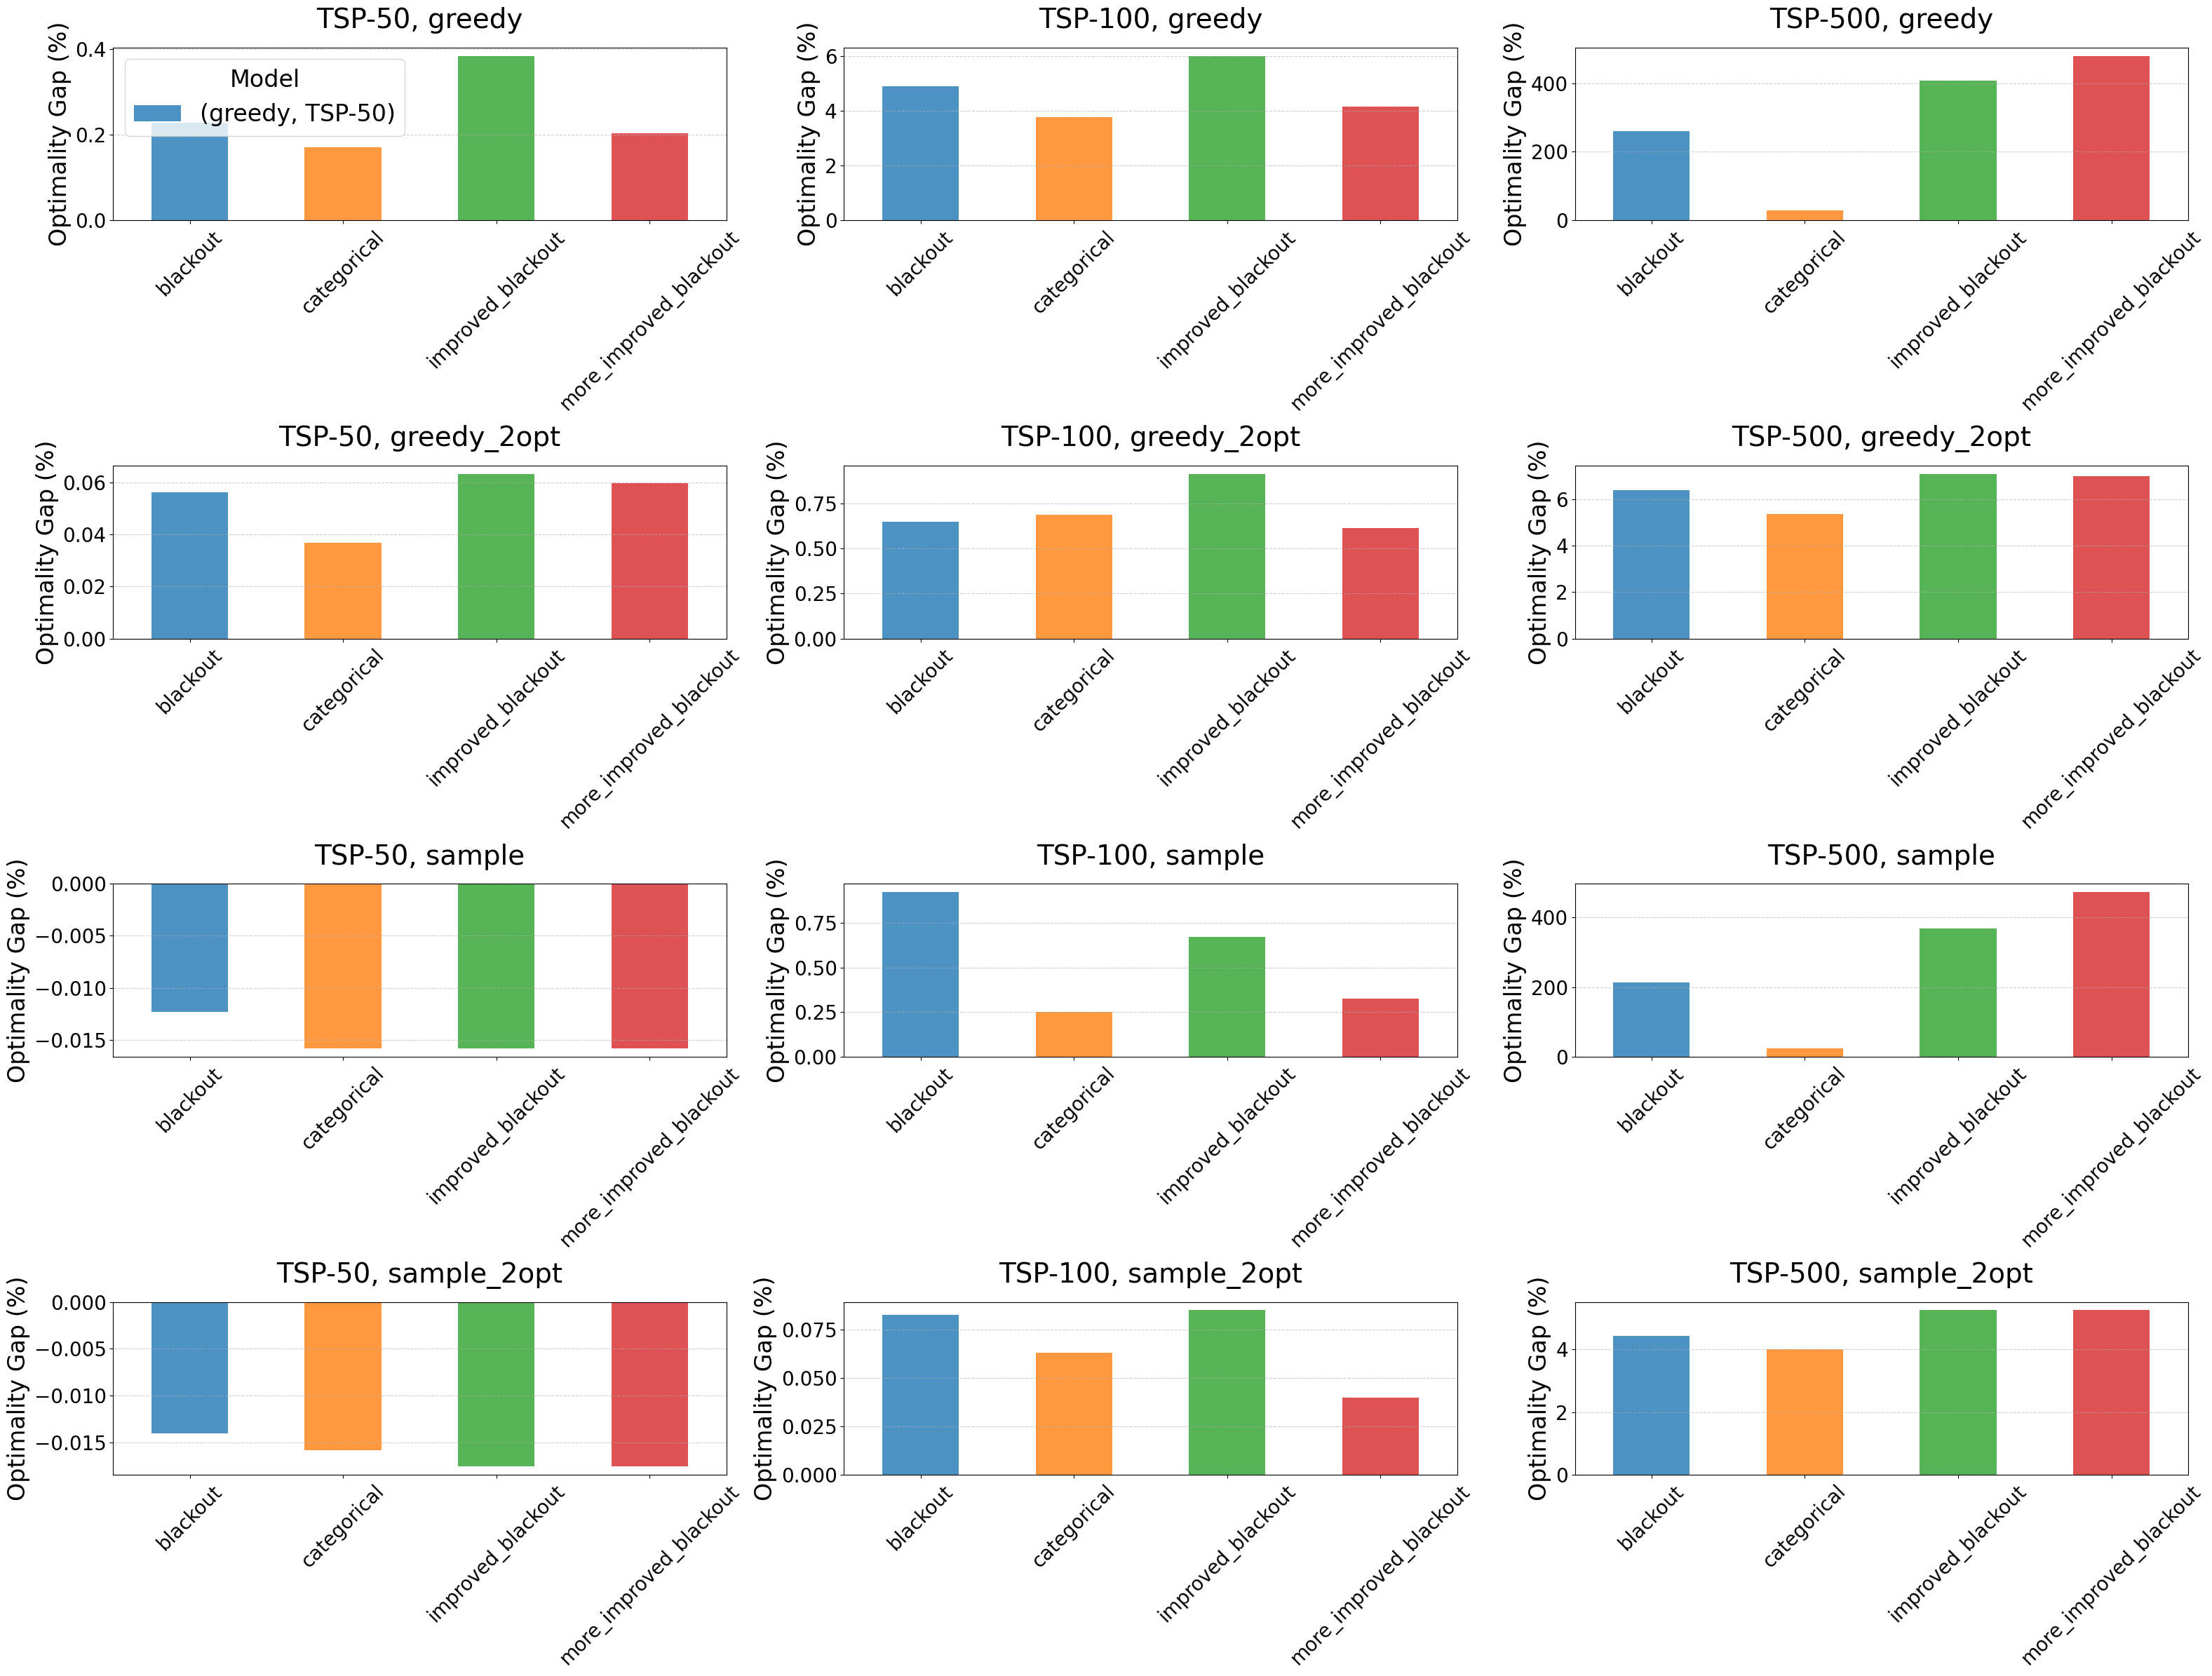

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# Load data
data = {
    "File": [
        "greedy-tsp100_blackout", "greedy-tsp100_more_improved_blackout", "greedy-tsp50_blackout",
        "greedy-tsp500_more_improved_blackout", "greedy-tsp500_blackout", "greedy-tsp500_improved_blackout",
        "greedy-tsp50_more_improved_blackout", "greedy-tsp100_improved_blackout", "greedy-tsp50_categorical",
        "greedy-tsp50_improved_blackout", "greedy-tsp500_categorical", "greedy-tsp100_categorical",
        "greedy_2opt-tsp100_blackout", "greedy_2opt-tsp100_more_improved_blackout", "greedy_2opt-tsp50_blackout",
        "greedy_2opt-tsp500_more_improved_blackout", "greedy_2opt-tsp500_blackout", "greedy_2opt-tsp500_improved_blackout",
        "greedy_2opt-tsp50_more_improved_blackout", "greedy_2opt-tsp100_improved_blackout", "greedy_2opt-tsp50_categorical",
        "greedy_2opt-tsp50_improved_blackout", "greedy_2opt-tsp500_categorical", "greedy_2opt-tsp100_categorical",
        "sample-tsp100_blackout", "sample-tsp100_more_improved_blackout", "sample-tsp50_blackout",
        "sample-tsp500_more_improved_blackout", "sample-tsp500_blackout", "sample-tsp500_improved_blackout",
        "sample-tsp50_more_improved_blackout", "sample-tsp100_improved_blackout", "sample-tsp50_categorical",
        "sample-tsp50_improved_blackout", "sample-tsp500_categorical", "sample-tsp100_categorical",
        "sample_2opt-tsp100_blackout", "sample_2opt-tsp100_more_improved_blackout", "sample_2opt-tsp50_blackout",
        "sample_2opt-tsp500_more_improved_blackout", "sample_2opt-tsp500_blackout", "sample_2opt-tsp500_improved_blackout",
        "sample_2opt-tsp50_more_improved_blackout", "sample_2opt-tsp100_improved_blackout", "sample_2opt-tsp50_categorical",
        "sample_2opt-tsp50_improved_blackout", "sample_2opt-tsp500_categorical", "sample_2opt-tsp100_categorical"
    ],
    "val/gt_cost": [
        7.7593, 7.7593, 5.6888, 16.5836, 16.5836, 16.5836, 5.6888, 7.7593, 5.6888, 5.6888, 16.5836, 7.7593,
        7.7593, 7.7593, 5.6888, 16.5836, 16.5836, 16.5836, 5.6888, 7.7593, 5.6888, 5.6888, 16.5836, 7.7593,
        7.7593, 7.7593, 5.6888, 16.5836, 16.5836, 16.5836, 5.6888, 7.7593, 5.6888, 5.6888, 16.5836, 7.7593,
        7.7593, 7.7593, 5.6888, 16.5836, 16.5836, 16.5836, 5.6888, 7.7593, 5.6888, 5.6888, 16.5836, 7.7593
    ],
    "val_solved_cost": [
        8.1402, 8.0820, 5.7018, 96.1816, 59.5824, 84.0509, 5.7004, 8.2264, 5.6985, 5.7107, 21.3278, 8.0516,
        7.8095, 7.8067, 5.6920, 17.7413, 17.6443, 17.7599, 5.6922, 7.8301, 5.6909, 5.6924, 17.4737, 7.8125,
        7.8310, 7.7846, 5.6881, 95.0985, 51.9534, 77.8347, 5.6879, 7.8115, 5.6879, 5.6879, 20.5145, 7.7787,
        7.7657, 7.7624, 5.6880, 17.4543, 17.3200, 17.4551, 5.6878, 7.7659, 5.6879, 5.6878, 17.2468, 7.7642
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate Optimality Gap (%)
df['Optimality Gap (%)'] = ((df['val_solved_cost'] - df['val/gt_cost']) / df['val/gt_cost']) * 100

# Extract models and dataset sizes
df['Dataset Size'] = df['File'].apply(lambda x: x.split('-')[1].split('_')[0].replace('tsp', 'TSP-'))
df['Model'] = df['File'].apply(lambda x: x.split('0_')[-1])
df['Postprocessing'] = df['File'].apply(lambda x: x.split('-')[0])
dataset_order = CategoricalDtype(categories=["TSP-50", "TSP-100", "TSP-500"], ordered=True)
df['Dataset Size'] = df['Dataset Size'].astype(dataset_order)

# Pivot table for plotting
pivot_table = df.pivot_table(index=['Postprocessing', 'Dataset Size'], columns=['Model'], values='Optimality Gap (%)')

# Increase the figure size and font sizes for publication-quality output
fig, axes = plt.subplots(4, 3, figsize=(32, 24), sharey=False)
axes = axes.flatten()

# Adjust font sizes for publication
title_fontsize = 28
label_fontsize = 24
tick_fontsize = 20
legend_fontsize = 24

for i, ((postprocessing, dataset_size), sub_data) in enumerate(pivot_table.iterrows()):
    ax = axes[i]
    sub_data.plot(kind='bar', ax=ax, color=colors, legend=False, alpha=0.8)
    ax.set_title(f'{dataset_size}, {postprocessing}', fontsize=title_fontsize, pad=20)
    ax.set_xlabel(None)
    ax.set_ylabel('Optimality Gap (%)', fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.tick_params(axis='x', rotation=45, labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    if i == 0:
        ax.legend(title='Model', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
